In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

print('Libraries Imported')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Libraries Imported


In [2]:
s3_client = boto3.client('s3', region_name='us-east-1')
bucket_name = 'msba-financial-data-ritvik'

In [3]:
files = s3_client.list_objects_v2(
    Bucket=bucket_name,
    Prefix = 'processed-data/combined_financial_data/train/'
)

In [4]:
import io

dfs = []
for obj in files.get('Contents', []):
    if obj['Key'].endswith('.parquet'):
        print(f"   Reading: {obj['Key']}")
        file_obj = s3_client.get_object(Bucket=bucket_name, Key=obj['Key'])
        df_temp = pd.read_parquet(io.BytesIO(file_obj['Body'].read()))
        dfs.append(df_temp)
        
df = pd.concat(dfs, ignore_index=True)
print('Training Data Loaded')

   Reading: processed-data/combined_financial_data/train/part-00000-31f68e42-3f3a-4d6c-84f3-0e8dbd0acc64-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/train/part-00001-31f68e42-3f3a-4d6c-84f3-0e8dbd0acc64-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/train/part-00002-31f68e42-3f3a-4d6c-84f3-0e8dbd0acc64-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/train/part-00003-31f68e42-3f3a-4d6c-84f3-0e8dbd0acc64-c000.snappy.parquet
Training Data Loaded


In [5]:
files_test = s3_client.list_objects_v2(
    Bucket=bucket_name,
    Prefix='processed-data/combined_financial_data/test/'
)

In [6]:
dfs_test = []
for obj in files_test.get('Contents', []):
    if obj['Key'].endswith('.parquet'):
        print(f"   Reading: {obj['Key']}")
        file_obj = s3_client.get_object(Bucket=bucket_name, Key=obj['Key'])
        df_temp = pd.read_parquet(io.BytesIO(file_obj['Body'].read()))
        dfs_test .append(df_temp)
df_test = pd.concat(dfs_test, ignore_index=True)
print('Test Data Loaded')

   Reading: processed-data/combined_financial_data/test/part-00000-a3aa98fc-bf1e-4abe-8ba6-edfe698e4691-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/test/part-00001-a3aa98fc-bf1e-4abe-8ba6-edfe698e4691-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/test/part-00002-a3aa98fc-bf1e-4abe-8ba6-edfe698e4691-c000.snappy.parquet
   Reading: processed-data/combined_financial_data/test/part-00003-a3aa98fc-bf1e-4abe-8ba6-edfe698e4691-c000.snappy.parquet
Test Data Loaded


In [7]:
print(f'Shape: {df.shape}')
print(f'Shape: {df_test.shape}')


Shape: (5522, 24)
Shape: (1297, 24)


In [8]:
bankruptcy_col = 'bankrupt'
bankruptcy_col

'bankrupt'

In [9]:
df.dtypes

bankrupt                                      int32
company_id                                   object
net_worth_to_assets                         float64
retained_earnings_to_total_assets           float64
working_capital_to_total_assets             float64
working_capital_to_equity                   float64
equity_to_longterm_liability                float64
current_liabilities_to_equity               float64
liability_to_equity                         float64
current_liability_to_current_assets         float64
borrowing_dependency                        float64
debt_ratio_percentage                       float64
persistent_eps                              float64
per_share_net_profit_pre_tax                float64
operating_profit_per_share                  float64
tax_rate                                    float64
operating_gross_margin                      float64
net_income_to_total_assets                  float64
roa_before_interest_percent_after_tax       float64
net_profit_b

In [10]:
miss = df.isnull().sum()
if miss.sum() > 0:
    print(miss[miss>0])
else:
    print('No missing values')
print()

No missing values



In [11]:
df.describe()

,bankrupt,net_worth_to_assets,retained_earnings_to_total_assets,working_capital_to_total_assets,working_capital_to_equity,equity_to_longterm_liability,current_liabilities_to_equity,liability_to_equity,current_liability_to_current_assets,borrowing_dependency,...,operating_profit_per_share,tax_rate,operating_gross_margin,net_income_to_total_assets,roa_before_interest_percent_after_tax,net_profit_before_tax_to_paid_in_capital,net_income_to_stockholders_equity,operating_profit_paid_in_capital,total_asset_turnover,total_expense_to_assets
count,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,...,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000
mean,0.032235,0.886930,0.934734,0.814207,0.735789,0.115828,0.331506,0.280490,0.031678,0.374813,...,0.109298,0.115100,0.608096,0.807902,0.558970,0.182976,0.840298,0.109170,0.141240,0.029226
std,0.176639,0.054449,0.026537,0.059537,0.012808,0.021421,0.014028,0.015398,0.032900,0.017118,...,0.028906,0.139957,0.015697,0.040579,0.065884,0.031848,0.015906,0.028728,0.101618,0.027929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.025851,0.153811,0.133503,0.000122,0.187124,...,0.000000,0.000000,0.156308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.850772,0.931285,0.774267,0.733604,0.110933,0.328084,0.276913,0.017990,0.370167,...,0.096246,0.000000,0.600457,0.796871,0.535979,0.169444,0.840125,0.096221,0.076462,0.014526
50%,0.000000,0.888729,0.937731,0.810320,0.736003,0.112375,0.329661,0.278774,0.027595,0.372585,...,0.104307,0.071971,0.606062,0.810916,0.560428,0.178580,0.841196,0.104166,0.118441,0.022676
75%,0.000000,0.927888,0.944905,0.850366,0.738586,0.117123,0.332314,0.281490,0.038421,0.376224,...,0.116196,0.206296,0.614017,0.826375,0.588857,0.191777,0.842362,0.116023,0.176912,0.035854
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.982879,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print(f"Total companies: {len(df):}")

Total companies: 5522


In [13]:
df[bankruptcy_col].value_counts()

bankrupt
0    5344
1     178
Name: count, dtype: int64

In [14]:
print(f'Bankruptcy Rate: {df[bankruptcy_col].mean() * 100:.2f}%')

Bankruptcy Rate: 3.22%


In [15]:
# 220 Bankrupt companies
# 6599 non-Bankrupt companies

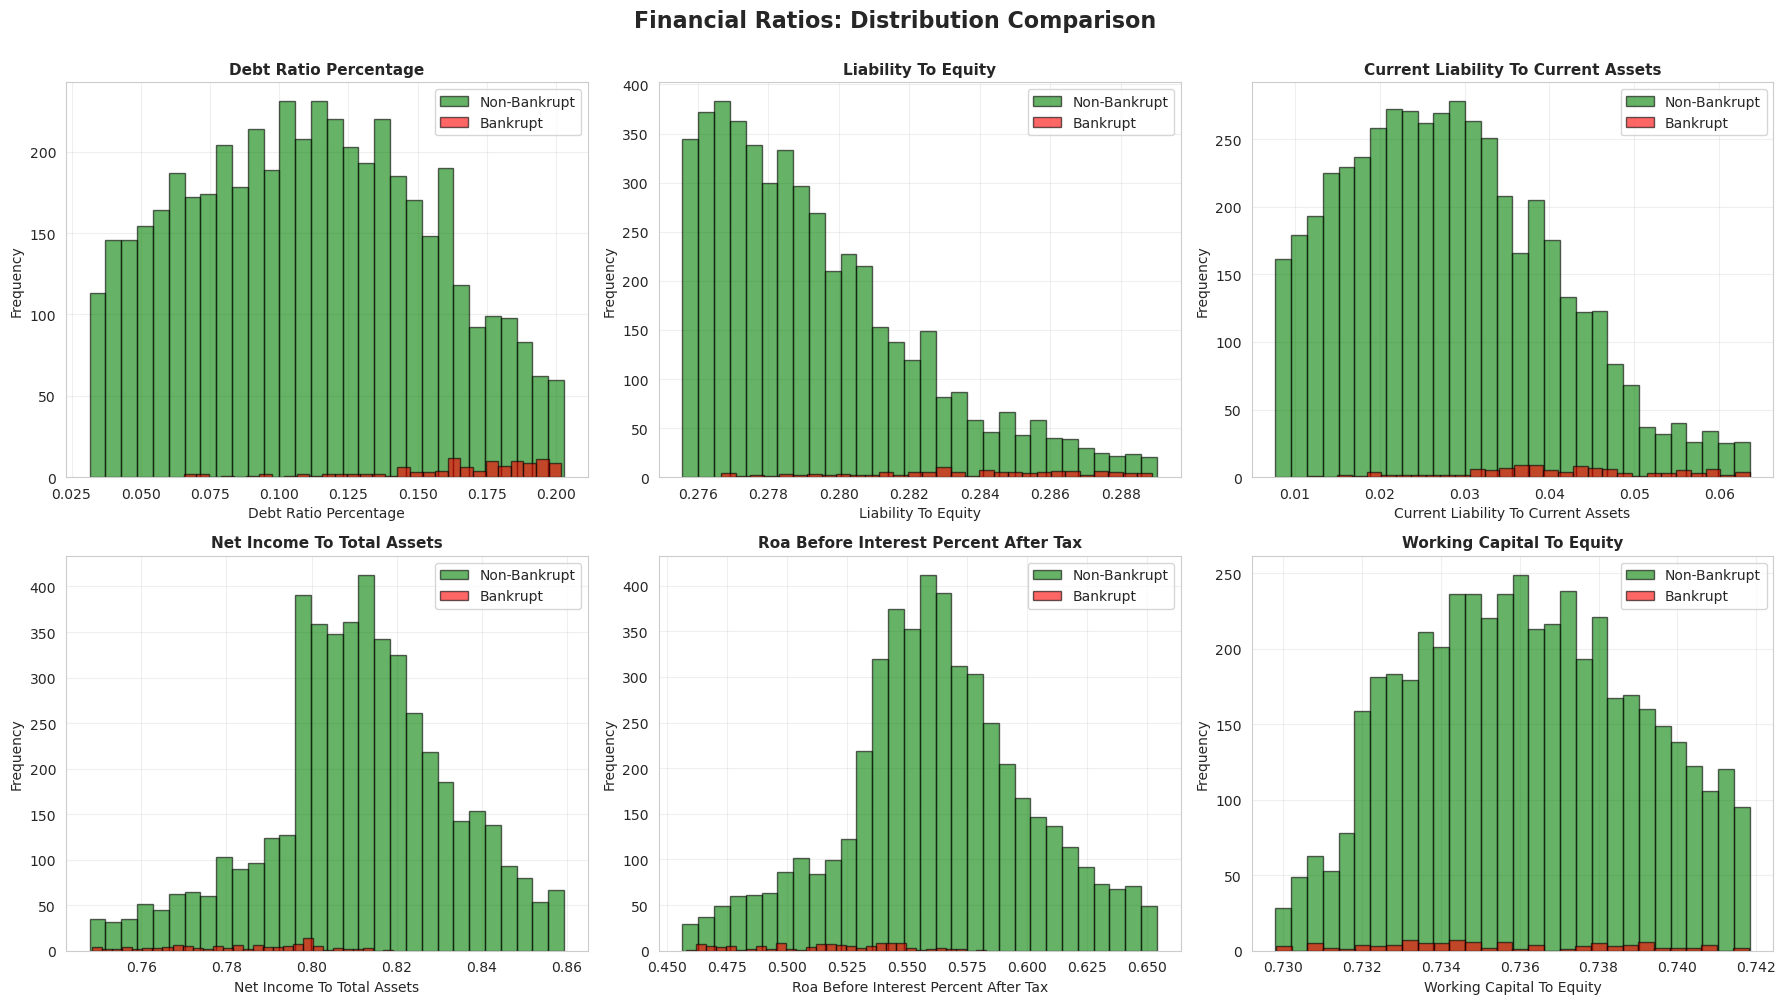

In [16]:
key_ratios = [
    'debt_ratio_percentage',
    'liability_to_equity',
    'current_liability_to_current_assets',
    'net_income_to_total_assets',
    'roa_before_interest_percent_after_tax',
    'working_capital_to_equity'
]

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for idx, ratio in enumerate(key_ratios):
    q1 = df[ratio].quantile(.05)
    q3 = df[ratio].quantile(.95)
    df_filtered = df[(df[ratio] >= q1) & (df[ratio] <= q3)]

    axes[idx].hist(df_filtered[df_filtered[bankruptcy_col]==0][ratio].dropna(), 
                   bins=30, alpha=0.6, label='Non-Bankrupt', color='green', edgecolor='black')
    axes[idx].hist(df_filtered[df_filtered[bankruptcy_col]==1][ratio].dropna(), 
                   bins=30, alpha=0.6, label='Bankrupt', color='red', edgecolor='black')
    
    axes[idx].set_xlabel(ratio.replace('_', ' ').title(), fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{ratio.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Financial Ratios: Distribution Comparison', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [17]:
comparison = df.groupby(bankruptcy_col)[key_ratios].mean().round(3)
comparison.index = ['non-Bankrupt', 'Bankrupt']
print("Mean Value Comparisons:")
print(comparison.T)

Mean Value Comparisons:
                                       non-Bankrupt  Bankrupt
debt_ratio_percentage                         0.111     0.188
liability_to_equity                           0.280     0.297
current_liability_to_current_assets           0.031     0.062
net_income_to_total_assets                    0.810     0.741
roa_before_interest_percent_after_tax         0.562     0.461
working_capital_to_equity                     0.736     0.724


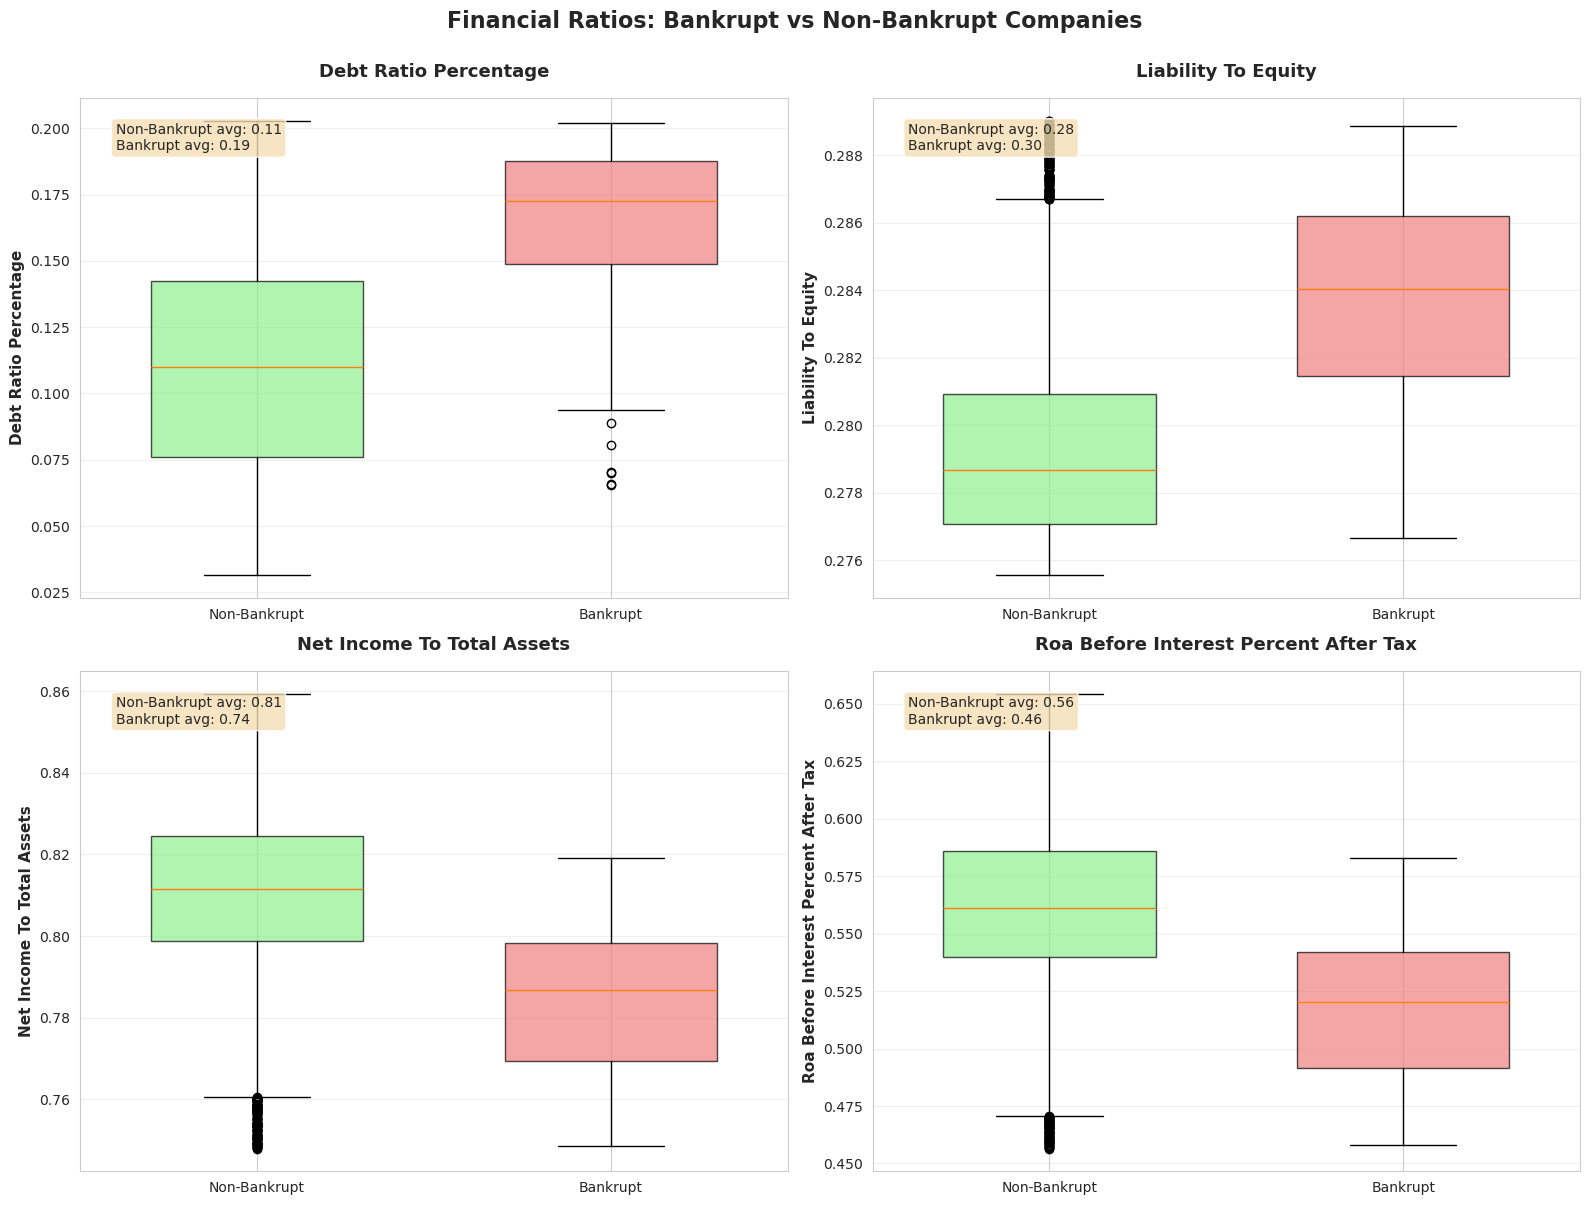

In [18]:
important_ratios = [
    'debt_ratio_percentage',
    'liability_to_equity', 
    'net_income_to_total_assets',
    'roa_before_interest_percent_after_tax'
]

fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.flatten()

for idx, ratio in enumerate(important_ratios):
    q1 = df[ratio].quantile(0.05)
    q3 = df[ratio].quantile(0.95)
    df_filtered = df[(df[ratio] >= q1) & (df[ratio] <= q3)]
    
    box_data = [df_filtered[df_filtered[bankruptcy_col]==0][ratio].dropna(),
                df_filtered[df_filtered[bankruptcy_col]==1][ratio].dropna()]
    
    bp = axes[idx].boxplot(box_data, labels=['Non-Bankrupt', 'Bankrupt'],
                           patch_artist=True, widths=0.6)
    
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[idx].set_ylabel(ratio.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{ratio.replace("_", " ").title()}', 
                        fontsize=13, fontweight='bold', pad=15)
    axes[idx].grid(axis='y', alpha=0.3)
    
    mean_no_bank = df[df[bankruptcy_col]==0][ratio].mean()
    mean_bank = df[df[bankruptcy_col]==1][ratio].mean()
    
    textstr = f'Non-Bankrupt avg: {mean_no_bank:.2f}\nBankrupt avg: {mean_bank:.2f}'
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Financial Ratios: Bankrupt vs Non-Bankrupt Companies', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [19]:
print("Key Differences between Bankrupt vs. Non-Bankrupt:")
for ratio in important_ratios:
    mean_normal = df[df[bankruptcy_col]==0][ratio].mean()
    mean_bankrupt = df[df[bankruptcy_col]==1][ratio].mean()
    if mean_normal != 0:
        diff_pct = ((mean_bankrupt - mean_normal) / mean_normal * 100) 
    else:
        0
    print(f'\n{ratio}: {diff_pct:+.1f}% difference')

Key Differences between Bankrupt vs. Non-Bankrupt:

debt_ratio_percentage: +70.2% difference

liability_to_equity: +6.2% difference

net_income_to_total_assets: -8.5% difference

roa_before_interest_percent_after_tax: -18.0% difference


In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'{len(numeric_cols)} numeric features')

23 numeric features


In [21]:
correlations = df[numeric_cols].corr()[bankruptcy_col].sort_values(ascending=False)
correlations = correlations.drop(bankruptcy_col)

print(correlations.head(10).to_string())
print("")
print(correlations.tail(10).to_string())

debt_ratio_percentage                  0.251741
borrowing_dependency                   0.214362
liability_to_equity                    0.198140
current_liabilities_to_equity          0.191041
current_liability_to_current_assets    0.166677
equity_to_longterm_liability           0.151755
total_expense_to_assets                0.125832
total_asset_turnover                  -0.068848
tax_rate                              -0.101525
operating_gross_margin                -0.109776

working_capital_to_equity                  -0.161235
per_share_net_profit_pre_tax               -0.194256
net_income_to_stockholders_equity          -0.195667
working_capital_to_total_assets            -0.199284
net_profit_before_tax_to_paid_in_capital   -0.199889
retained_earnings_to_total_assets          -0.206084
persistent_eps                             -0.211888
net_worth_to_assets                        -0.251741
roa_before_interest_percent_after_tax      -0.271845
net_income_to_total_assets                

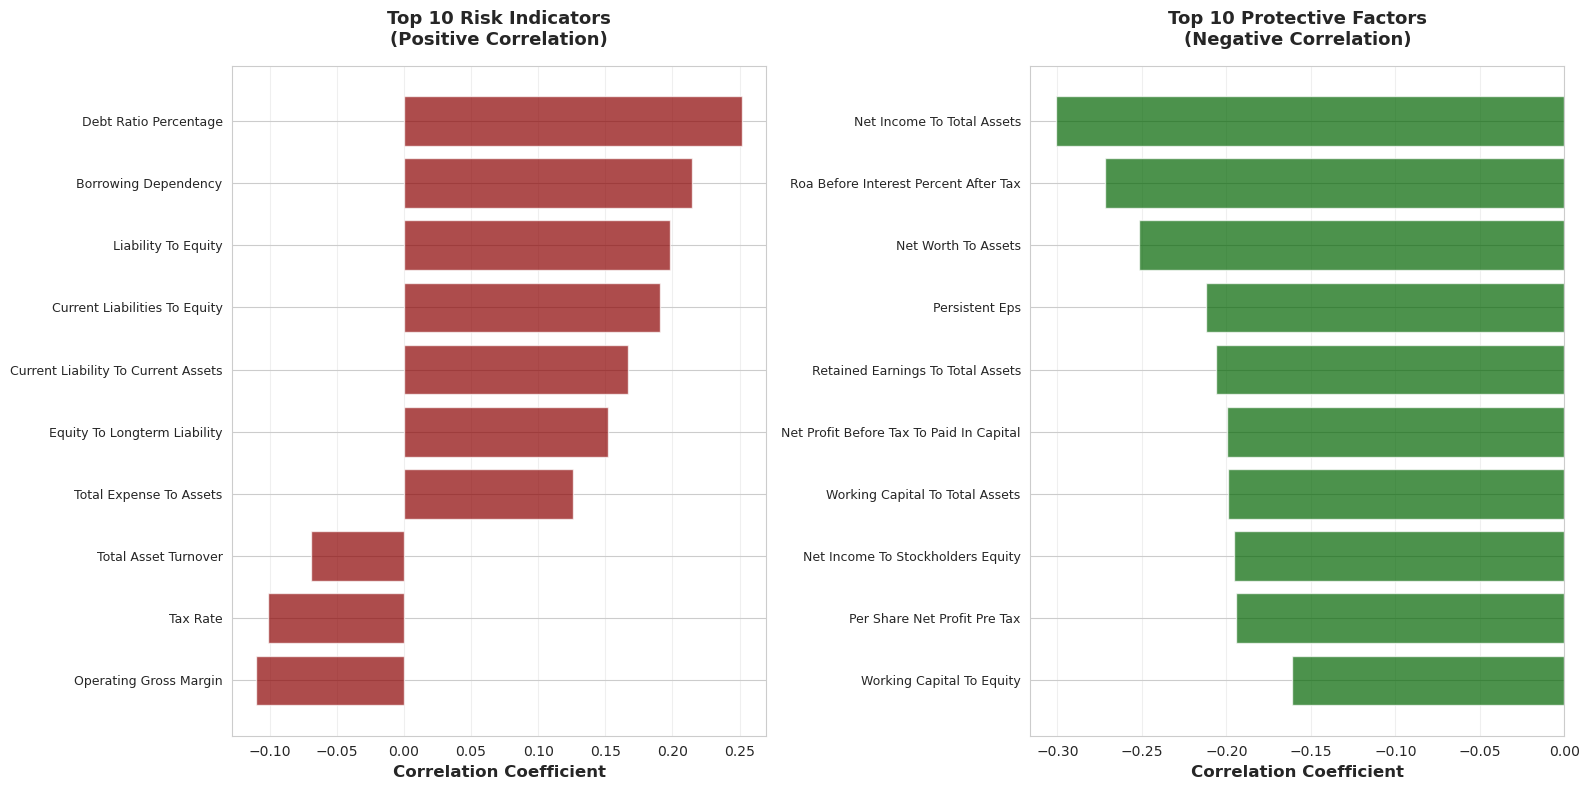

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

top_10_pos = correlations.head(10)
axes[0].barh(range(len(top_10_pos)), top_10_pos.values, color='darkred', alpha=0.7)
axes[0].set_yticks(range(len(top_10_pos)))
axes[0].set_yticklabels([col.replace('_', ' ').title() for col in top_10_pos.index], fontsize=9)
axes[0].set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Risk Indicators\n(Positive Correlation)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top negative correlations (protective factors)
top_10_neg = correlations.tail(10).sort_values()
axes[1].barh(range(len(top_10_neg)), top_10_neg.values, color='darkgreen', alpha=0.7)
axes[1].set_yticks(range(len(top_10_neg)))
axes[1].set_yticklabels([col.replace('_', ' ').title() for col in top_10_neg.index], fontsize=9)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Protective Factors\n(Negative Correlation)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_cols = [col for col in df.columns if col not in ['company_id', bankruptcy_col]]
print(f'{len(feature_cols)} features for prediction')

X = df[feature_cols].copy()
y = df[bankruptcy_col].copy()
print(f'Target distribution: {y.value_counts().to_dict()}')

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set: {X_train.shape[0]} samples ({y_train.mean()*100:.1f}% bankruptcy)")
print(f"Test set: {X_test.shape[0]} samples ({y_test.mean()*100:.1f}% bankruptcy)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

22 features for prediction
Target distribution: {0: 5344, 1: 178}
Training set: 4417 samples (3.2% bankruptcy)
Test set: 1105 samples (3.3% bankruptcy)


              precision    recall  f1-score   support

non-Bankrupt       0.98      0.97      0.97      1069
    Bankrupt       0.27      0.33      0.30        36

    accuracy                           0.95      1105
   macro avg       0.62      0.65      0.63      1105
weighted avg       0.95      0.95      0.95      1105



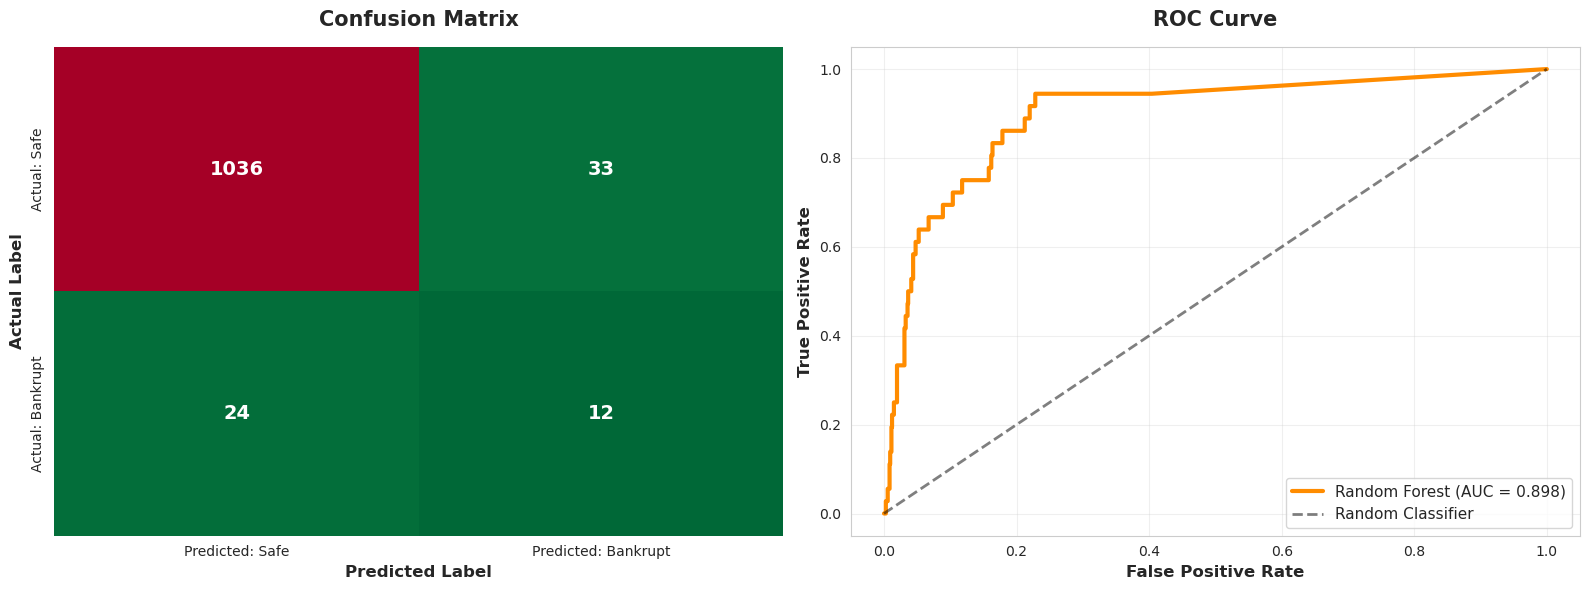

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# Decided to use RF for this 
rf_model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10,
    min_samples_split = 5,
    random_state = 42,
    class_weight = 'balanced',
    n_jobs = -1
)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(classification_report(y_test, y_pred, target_names=['non-Bankrupt', 'Bankrupt']))


fig, axes = plt.subplots(1, 2, figsize=(16,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', cbar=False, ax=axes[0],
            xticklabels = ['Predicted: Safe', 'Predicted: Bankrupt'],
            yticklabels = ['Actual: Safe', 'Actual: Bankrupt'],
            annot_kws = {"fontsize": 14, 'fontweight': 'bold'})
axes[0].set_title('Confusion Matrix', fontsize=15, fontweight='bold', pad=15)
axes[0].set_ylabel('Actual Label', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, linewidth=3, label=f'Random Forest (AUC = {roc_auc:.3f})', color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
axes[1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve', fontsize=15, fontweight='bold', pad=15)
axes[1].legend(fontsize=11, loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance.head(10).to_string(index=False))

Top 10 most important features:
                                 feature  importance
                    borrowing_dependency    0.131195
                          persistent_eps    0.107448
              net_income_to_total_assets    0.095930
            per_share_net_profit_pre_tax    0.070879
       retained_earnings_to_total_assets    0.062052
                     net_worth_to_assets    0.061965
                   debt_ratio_percentage    0.060598
                     liability_to_equity    0.048988
   roa_before_interest_percent_after_tax    0.048194
net_profit_before_tax_to_paid_in_capital    0.047844


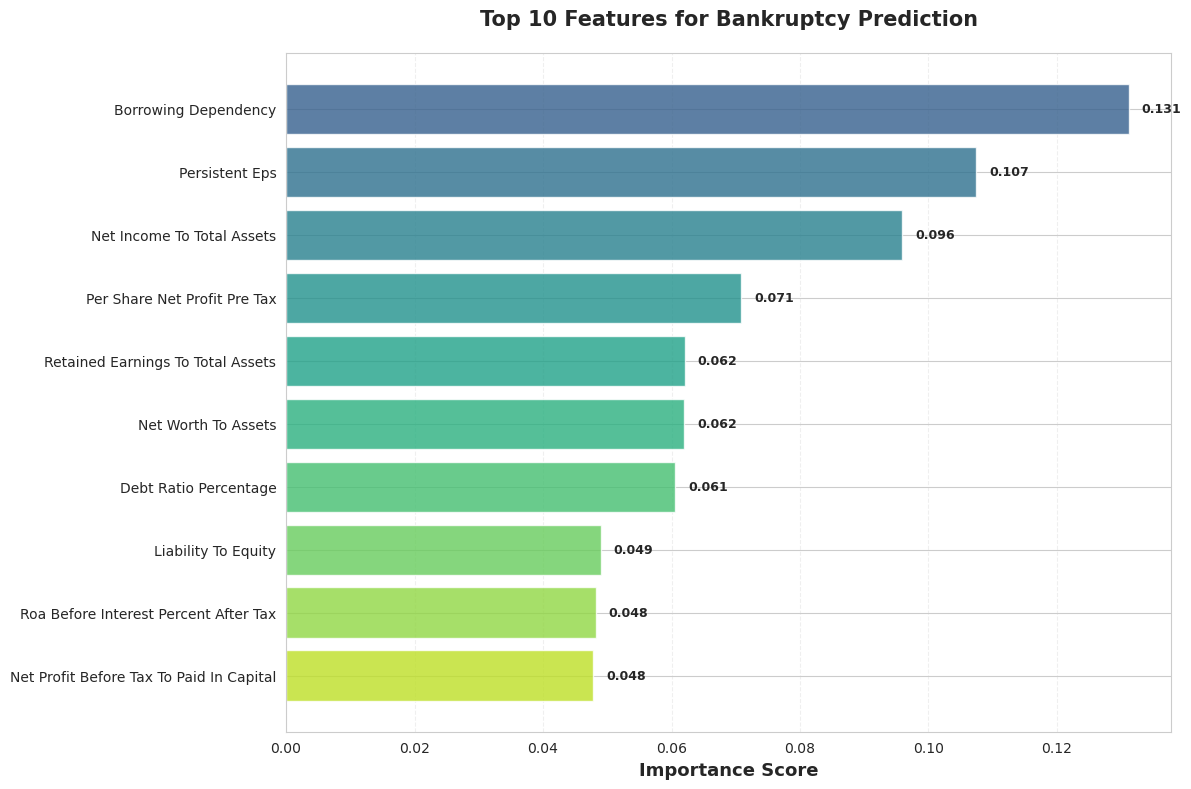

In [26]:
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.8)

plt.yticks(range(len(top_features)), [f.replace('_', ' ').title() for f in top_features['feature']], fontsize=10)
plt.xlabel('Importance Score', fontsize=13, fontweight='bold')
plt.title('Top 10 Features for Bankruptcy Prediction', fontsize=15, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(top_features.iterrows()):
    plt.text(row['importance'] + 0.002, i, f"{row['importance']:.3f}", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [27]:
obj_predict = s3_client.get_object(
    Bucket=bucket_name,
    Key = 'machine-learning-data/company_profiles_to_predict_unlabeled.csv'
)

df_predict = pd.read_csv(obj_predict['Body'])
df_predict.head()

,borrowing_dependency,company,company_id,current_liabilities_to_equity,current_liability_to_current_assets,debt_ratio_percentage,equity_to_longterm_liability,liability_to_equity,net_income_to_stockholders_equity,net_income_to_total_assets,...,operating_profit_per_share,per_share_net_profit_pre_tax,persistent_eps,retained_earnings_to_total_assets,roa_before_interest_percent_after_tax,tax_rate,total_asset_turnover,total_expense_to_assets,working_capital_to_equity,working_capital_to_total_assets
0,0.458819,western corp,id_6988,0.372218,0.060766,0.269039,0.216878,0.337315,0.765967,0.641804,...,0.050566,0.106274,0.154297,0.879445,0.344636,0.000000,0.068966,0.079232,0.718867,0.720006
1,0.379304,design solutions,id_7413,0.333345,0.041220,0.161865,0.120812,0.282763,0.840533,0.800780,...,0.107727,0.175868,0.217737,0.933467,0.544320,0.564328,0.107946,0.038927,0.733645,0.769527
2,0.384999,innocore,id_8801,0.337392,0.060765,0.216102,0.120561,0.292504,0.829980,0.736619,...,0.099910,0.128945,0.161482,0.911441,0.445704,0.000000,0.100450,0.092802,0.728731,0.729416
3,0.374219,pharmasolve,id_9614,0.329804,0.030201,0.108202,0.114508,0.278607,0.841459,0.815350,...,0.104796,0.180462,0.225206,0.935449,0.570922,0.157607,0.218891,0.025482,0.734946,0.797005
4,0.370253,ninetech,id_9131,0.328093,0.021710,0.058591,0.110933,0.276423,0.840487,0.803647,...,0.095188,0.173157,0.218398,0.935200,0.545137,0.005871,0.154423,0.029884,0.735182,0.813738


In [28]:
if 'company_name' in df_predict.columns:
    company_names = df_predict['company_name'].copy()
elif 'company' in df_predict.columns:
    company_names = df_predict['company'].copy()
else:
    company_names = [f"Company_{i+1}" for i in range(len(df_predict))]

if 'company_id' in df_predict.columns:
    company_ids = df_predict['company_id'].copy()
else:
    company_ids = [f"ID_{i+1}" for i in range(len(df_predict))]

In [29]:
X_predict = df_predict[feature_cols].copy()

X_predict = X_predict.replace([np.inf, -np.inf], np.nan)
X_predict = X_predict.fillna(X_predict.median())

X_predict_scaled = scaler.transform(X_predict)

predictions = rf_model.predict(X_predict_scaled)
prediction_probabilities = rf_model.predict_proba(X_predict_scaled)[:,1]

results = pd.DataFrame({
    'company_id': company_ids,
    'company_name': company_names,
    'bankruptcy_prediction': predictions,
    'bankruptcy_probability': prediction_probabilities,
    'bankruptcy_risk_pct': prediction_probabilities * 100
})

def categorize_risk(prob):
    if prob < .2:
        return 'LOW RISK'
    elif prob < .5:
        return 'MEDIUM RISK'
    else:
        return 'HIGH RISK'

results['risk_category'] = results['bankruptcy_probability'].apply(categorize_risk)
results = results.sort_values('bankruptcy_probability', ascending=False)

print("Bankruptcy Predictions")
print(results[['company_name', 'bankruptcy_risk_pct', 'risk_category']].to_string(index=False))

Bankruptcy Predictions
    company_name  bankruptcy_risk_pct risk_category
    western corp            87.746471     HIGH RISK
design solutions            68.107294     HIGH RISK
        innocore            59.094088     HIGH RISK
  Hallandall ag.             3.967326      LOW RISK
 Highwood & Hart             1.922494      LOW RISK
    songster inc             1.000000      LOW RISK
        ninetech             0.000000      LOW RISK
     pharmasolve             0.000000      LOW RISK
 rogers and sons             0.000000      LOW RISK
  Foster & Kruse             0.000000      LOW RISK


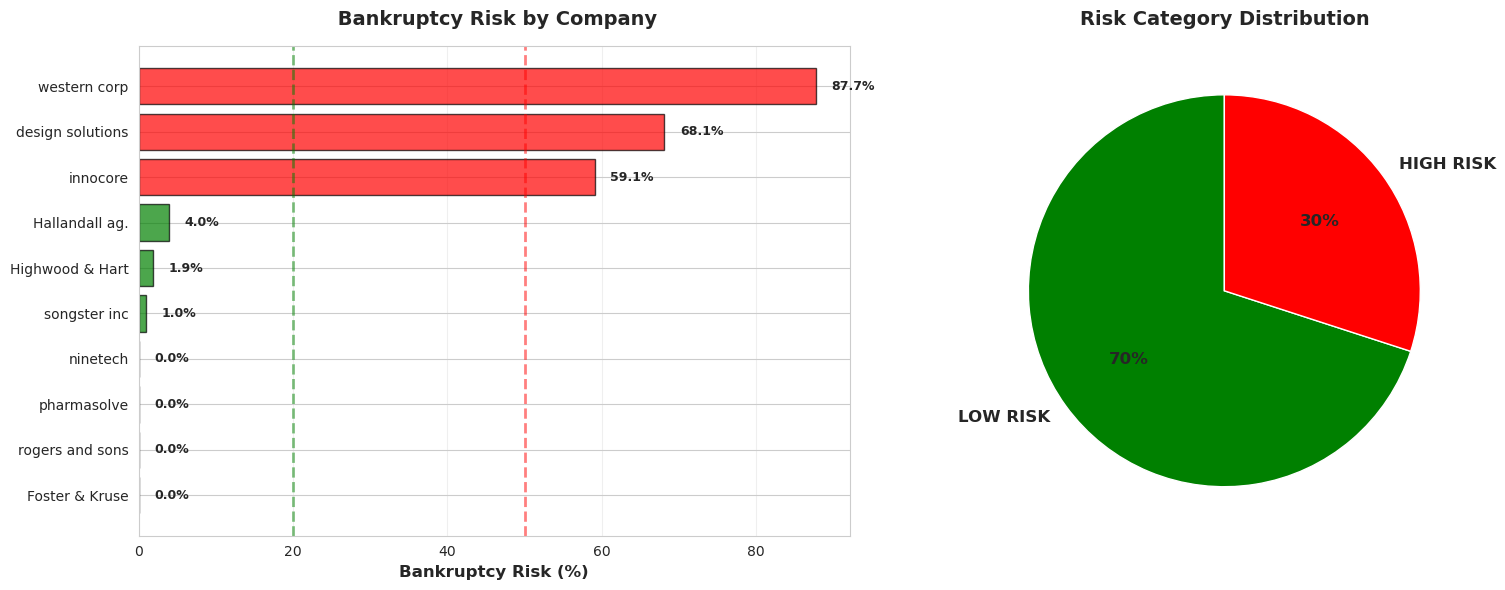

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

colors = ['red' if p > .5 else 'orange' if p > .2 else 'green' for p in results['bankruptcy_probability']]
axes[0].barh(range(len(results)), results['bankruptcy_risk_pct'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(results)))
axes[0].set_yticklabels(results['company_name'], fontsize=10)
axes[0].set_xlabel('Bankruptcy Risk (%)', fontsize=12, fontweight='bold')
axes[0].set_title(' Bankruptcy Risk by Company', fontsize=14, fontweight='bold', pad=15)
axes[0].axvline(x=20, color='green', linestyle='--', linewidth=2, alpha=0.5)
axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

for i, (idx, row) in enumerate(results.iterrows()):
    axes[0].text(row['bankruptcy_risk_pct'] + 2, i, f"{row['bankruptcy_risk_pct']:.1f}%", 
                va='center', fontsize=9, fontweight='bold')
    
risk_counts = results['risk_category'].value_counts()
colors_pie = ['green', 'red', 'orange']
axes[1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.0f%%',
           colors=colors_pie, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Risk Category Distribution', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

In [31]:
low_risk = results[results['risk_category'] == 'LOW RISK']
medium_risk = results[results['risk_category'] == 'MEDIUM RISK']
high_risk = results[results['risk_category'] == 'HIGH RISK']

print("These companies show LOW bankruptcy risk:")
for idx, row in low_risk.iterrows():
    print(f"{row['company_name']}:")
    print(f" Bankruptcy Risk: {row['bankruptcy_risk_pct']:.1f}%")

These companies show LOW bankruptcy risk:
Hallandall ag.:
 Bankruptcy Risk: 4.0%
Highwood & Hart:
 Bankruptcy Risk: 1.9%
songster inc:
 Bankruptcy Risk: 1.0%
ninetech:
 Bankruptcy Risk: 0.0%
pharmasolve:
 Bankruptcy Risk: 0.0%
rogers and sons:
 Bankruptcy Risk: 0.0%
Foster & Kruse:
 Bankruptcy Risk: 0.0%


In [32]:
print("These companies show MEDIUM bankruptcy risk:")
if len(medium_risk) > 0:
    for idx, row in medium_risk.iterrows():
        print(f"{row['company_name']}")
        print(f" Bankruptcy Risk: {row['bankruptcy_risk_pct']:.1f}%")
else:
    print("No companies available")


These companies show MEDIUM bankruptcy risk:
No companies available


In [33]:
print("These companies show HIGH bankruptcy risk:")
if len(high_risk) > 0:
    for idx, row in high_risk.iterrows():
        print(f"{row['company_name']}")
        print(f" Bankruptcy Risk: {row['bankruptcy_risk_pct']:.1f}%")

These companies show HIGH bankruptcy risk:
western corp
 Bankruptcy Risk: 87.7%
design solutions
 Bankruptcy Risk: 68.1%
innocore
 Bankruptcy Risk: 59.1%


In [34]:
print(f"Total companies evaluated: {len(results)}")
print(f"Recommended for investment: {len(low_risk)}")
print(f"Not recommended: {len(high_risk)}")


Total companies evaluated: 10
Recommended for investment: 7
Not recommended: 3


In [35]:
summary_table = results[['company_name', 'bankruptcy_risk_pct', 'risk_category']].copy()
summary_table['recommendation'] = summary_table['risk_category'].map({
    'LOW RISK' : 'INVEST',
    'MEDIUM RISK' : 'DO RESEARCH',
    'HIGH RISK' : 'AVOID'
})
print(summary_table.to_string(index=False))

    company_name  bankruptcy_risk_pct risk_category recommendation
    western corp            87.746471     HIGH RISK          AVOID
design solutions            68.107294     HIGH RISK          AVOID
        innocore            59.094088     HIGH RISK          AVOID
  Hallandall ag.             3.967326      LOW RISK         INVEST
 Highwood & Hart             1.922494      LOW RISK         INVEST
    songster inc             1.000000      LOW RISK         INVEST
        ninetech             0.000000      LOW RISK         INVEST
     pharmasolve             0.000000      LOW RISK         INVEST
 rogers and sons             0.000000      LOW RISK         INVEST
  Foster & Kruse             0.000000      LOW RISK         INVEST


In [36]:
csv_buffer = StringIO()
results.to_csv(csv_buffer, index=False)

s3_client.put_object(
    Bucket = bucket_name,
    Key = 'predictions/bankruptcy_predictions.csv',
    Body = csv_buffer.getvalue()
)

print('predictions saved to s3')

predictions saved to s3


In [37]:
# Summary metrics for presentation (potential)
print(f"Model Accuracy: {accuracy*100:.1f}%")
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Companies to invest in: {len(low_risk)}")
print(f"Companies to avoid: {len(high_risk)}")
print(f"Top 3 risk indicators: {', '.join(feature_importance.head(3)['feature'].tolist())}")

Model Accuracy: 94.8%
ROC-AUC Score: 0.898
Companies to invest in: 7
Companies to avoid: 3
Top 3 risk indicators: borrowing_dependency, persistent_eps, net_income_to_total_assets
